# Problem 4

### Part 1

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(1)

n = 100
samples = []

for i in range(n):
    x1 = np.random.normal(3, 3)
    x2 = (1/2)*x1 + np.random.normal(4, 2)
    samples.append([x1, x2])

mean = [sum([sample[0] for sample in samples])/n , sum([sample[1] for sample in samples])/n]

print(mean)

In [11]:
cov = np.cov([[sample[0] for sample in samples], [sample[1] for sample in samples]])

print(cov)

[[6.70967433 2.66118668]
 [2.66118668 4.57778516]]


In [41]:
eigenvalues, eigenvectors = np.linalg.eig(cov)

print(eigenvalues)
print(eigenvectors)

[8.51046175 2.77699773]
[[ 0.82820066 -0.56043168]
 [ 0.56043168  0.82820066]]


/srv/conda/envs/notebook/lib/python3.6/site-packages/ipykernel_launcher.py:19: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


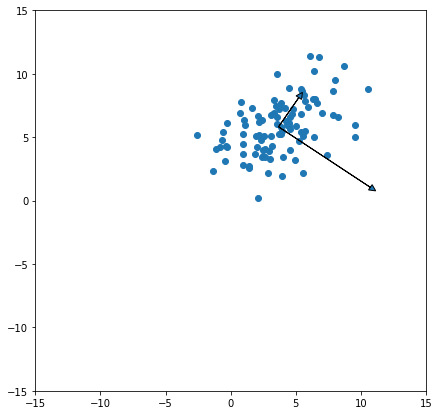

In [49]:
plt.figure(figsize = (7,7))

plt.xlim(-15, 15)
plt.ylim(-15, 15)

plt.scatter([sample[0] for sample in samples], [sample[1] for sample in samples])

v0 = eigenvectors[0]
v0dir = np.arctan(v0[1]/v0[0])
v0x0scaled = eigenvalues[0]*np.cos(v0dir)
v0x1scaled = eigenvalues[0]*np.sin(v0dir)


v1 = eigenvectors[1]
v1dir = np.arctan(v1[1]/v1[0])
v1x0scaled = eigenvalues[1]*np.cos(v1dir)
v1x1scaled = eigenvalues[1]*np.sin(v1dir)

ax = plt.axes()
ax.arrow(mean[0], mean[1], v0x0scaled, v0x1scaled, head_width=0.5, head_length=0.5)
ax.arrow(mean[0], mean[1], v1x0scaled, v1x1scaled, head_width=0.5, head_length=0.5)

plt.show()

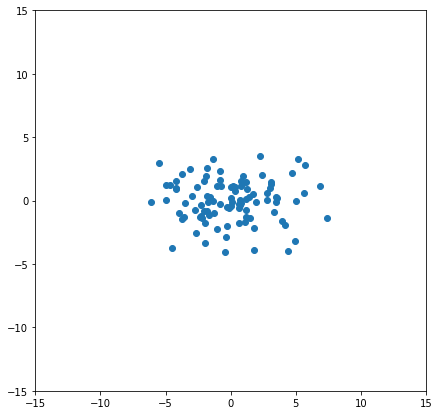

In [53]:
centered_samples = []
for sample in samples:
    centered_samples.append([sample[0] - mean[0], sample[1] - mean[1]])
    
rotated_samples = []
for sample in centered_samples:
    rotated_samples.append(np.dot(np.transpose(eigenvectors), sample))
    
plt.figure(figsize = (7,7))

plt.xlim(-15, 15)
plt.ylim(-15, 15)

plt.scatter([sample[0] for sample in rotated_samples], [sample[1] for sample in rotated_samples])

plt.show()